# 2次元ガウス分布のヒートマップ
- Simon J. D. Prince "Computer Vision:  Models, Learning, and Inference" (http://www.computervisionmodels.com/) に出てくるヒートマップの出し方を再現したもの

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [2]:
# メッシュグリッドの作成
X, Y = np.mgrid[-5:5:200j, -5:5:200j]

In [3]:
'''#ほかの方法：
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(X, Y)
'''

'#ほかの方法：\nX = np.linspace(-5, 5, 200)\nY = np.linspace(-5, 5, 200)\nX, Y = np.meshgrid(X, Y)\n'

In [4]:
# 2次元ガウス分布
Z = mlab.bivariate_normal(X, Y, 2., 1., 0., 0.)

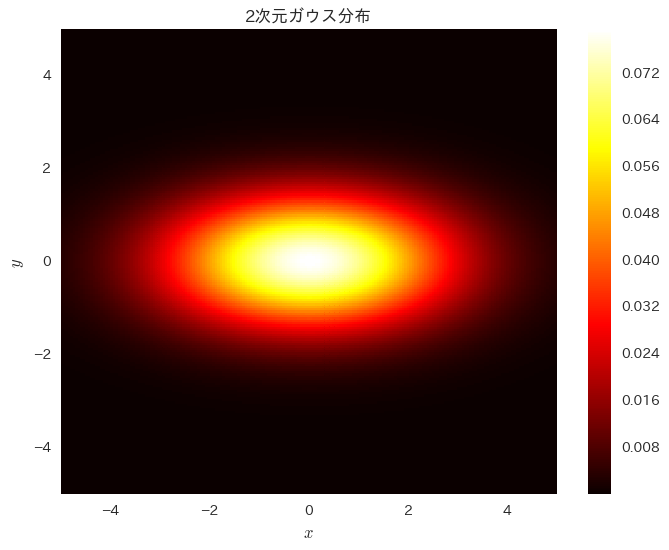

In [5]:
# ヒートマップを描画
plt.figure(figsize=(8, 6))
plt.pcolor(X, Y, Z, cmap=plt.cm.hot)
plt.colorbar()
plt.title('2次元ガウス分布')
plt.xlabel('$x$', size=12)
plt.ylabel('$y$', size=12)

plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.show()


### 2次元ガウス分布の重ね合わせ

In [6]:
_Z = []

Z1 = mlab.bivariate_normal(X, Y, 1., 2., 1., -1.)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 1.5, -1.5, -2.)
Z3 = (Z1 + Z2)/2

_Z.append(Z1)
_Z.append(Z2)
_Z.append(Z3)
_Z = np.array(_Z)

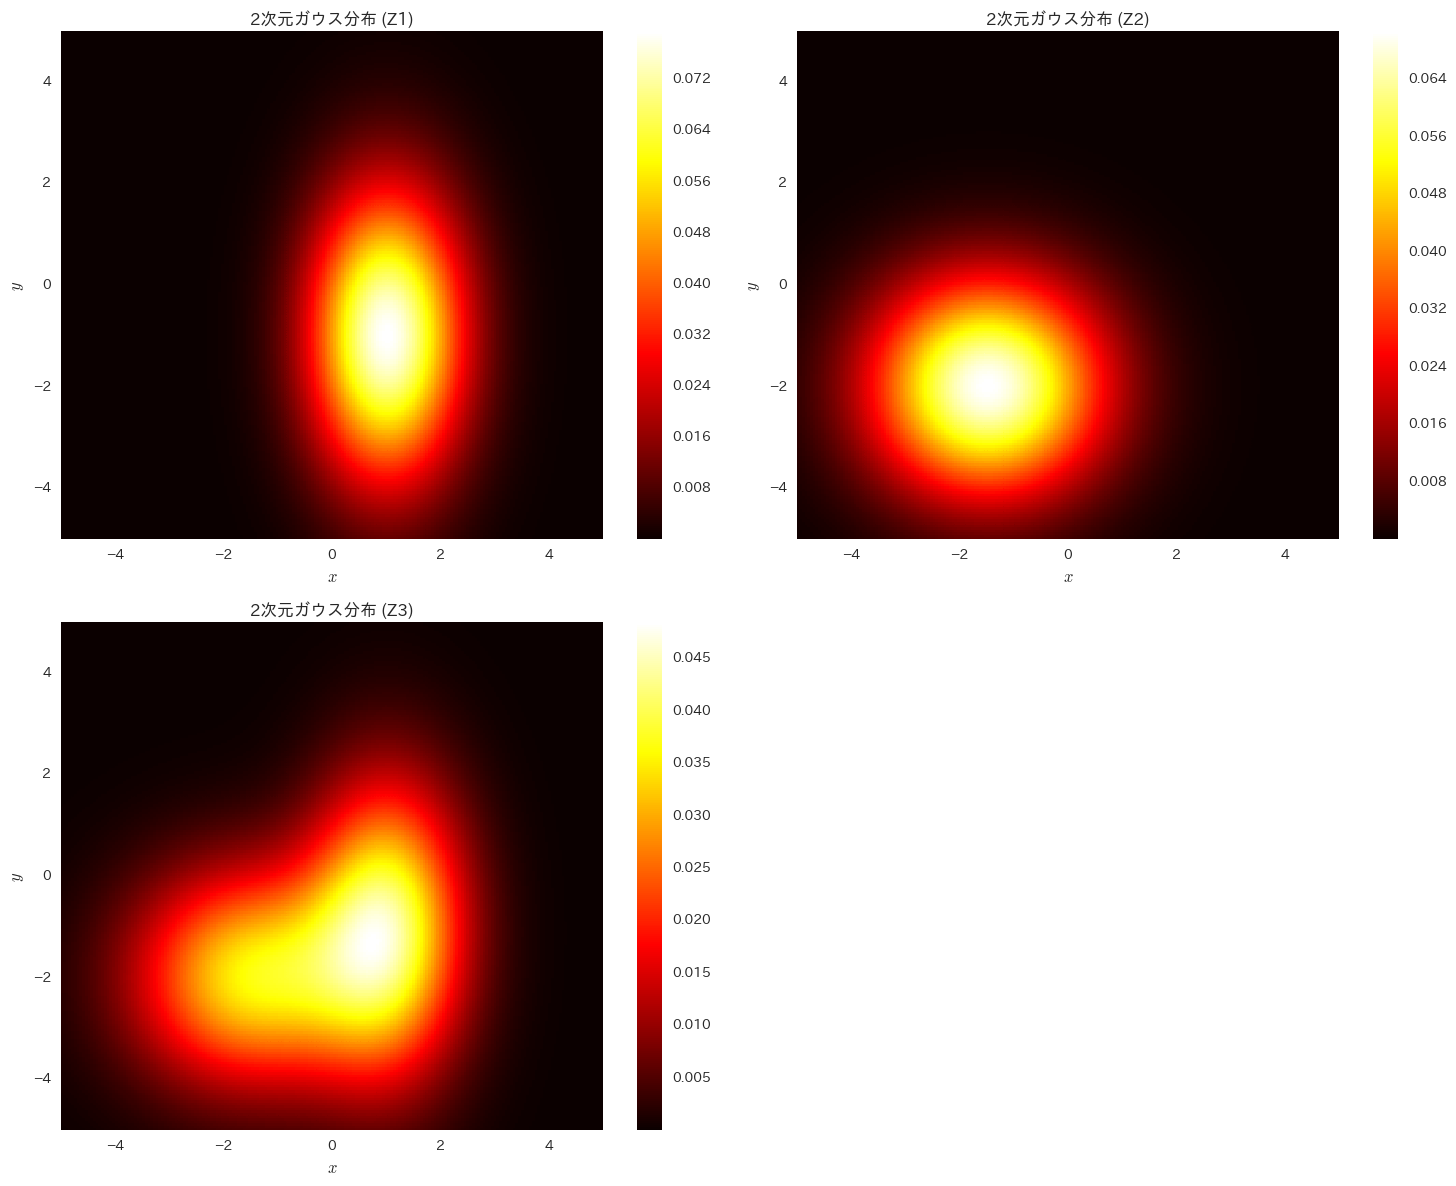

In [7]:
_titles = ['Z1', 'Z2', 'Z3']

# 描画
plt.figure(figsize=(15, 12))

for k in range(3):
    _title = _titles[k]
    plt.subplot(2, 2, (k+1))
    plt.pcolor(X, Y, _Z[k], cmap=plt.cm.hot)
    plt.colorbar()
    plt.title('2次元ガウス分布 ({})'.format(_title))
    plt.xlabel('$x$', size=12)
    plt.ylabel('$y$', size=12)
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    
plt.tight_layout()
plt.show()


### ヒートマップと等高線

/opt/conda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/opt/conda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


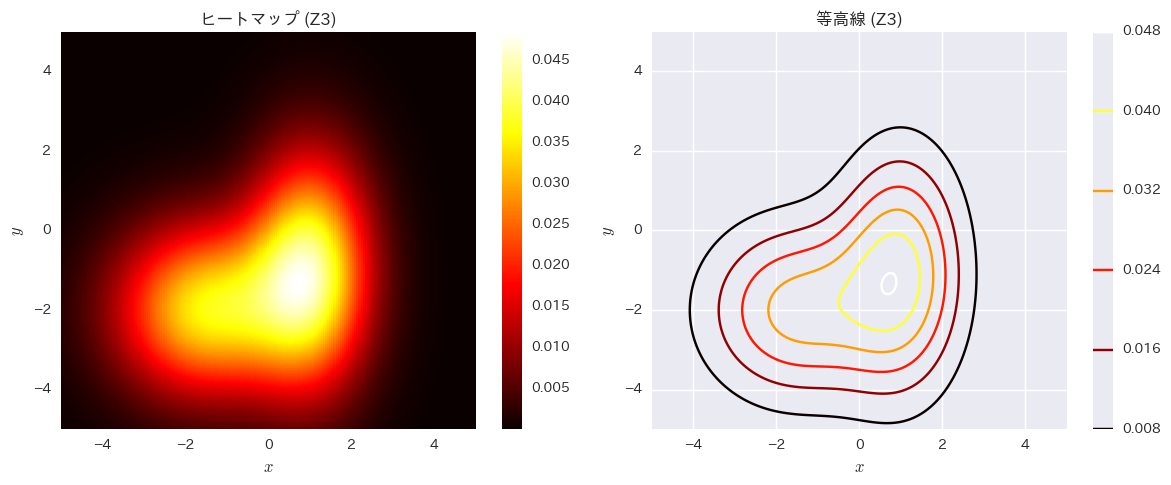

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.pcolor(X, Y, _Z[2], cmap=plt.cm.hot)
plt.colorbar()
plt.title('ヒートマップ (Z3)')
plt.xlabel('$x$', size=12)
plt.ylabel('$y$', size=12)
plt.xlim((-5,5))
plt.ylim((-5,5))

plt.subplot(122)
plt.contour(X, Y, _Z[2], cmap=plt.cm.hot)
plt.colorbar()
plt.title('等高線 (Z3)')
plt.xlabel('$x$', size=12)
plt.ylabel('$y$', size=12)
plt.xlim((-5,5))
plt.ylim((-5,5))

plt.tight_layout()
plt.show()

